# Game of Life

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from utils import savefig
# make a directory for figures
!mkdir -p figs

## Game of Life entities



In [5]:
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')

In [6]:
from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

The following function creates a `Life` object and sets the initial condition using strings of `0` and `1` characters.

In [7]:
def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

A beehive is a stable entity, also called a "still life"

Saving figure to file figs/chap06-1


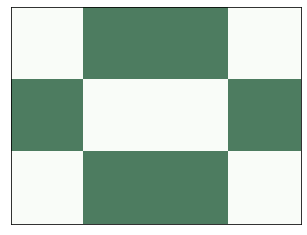

In [8]:
# beehive
life = make_life(3, 4, 0, 0, '0110', '1001', '0110')
life.draw()
savefig('figs/chap06-1')

Here's what it looks like after one step:

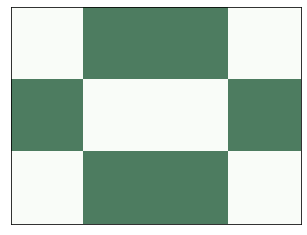

In [9]:
life.step()
life.draw()

A toad is an oscillator with period 2.  Here's are its two configurations:

Saving figure to file figs/chap06-2


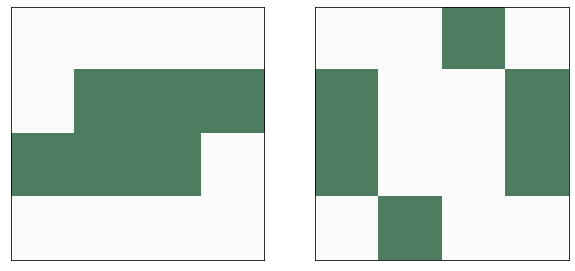

In [10]:
# toad
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(4, 4, 1, 0, '0111', '1110')
life.draw()

plt.subplot(1, 2, 2)
life.step()
life.draw()

savefig('figs/chap06-2')

Here's what the toad looks like as an animation.

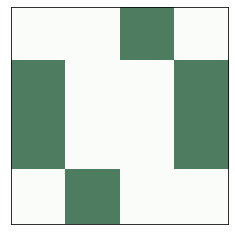

In [11]:
life = make_life(4, 4, 1, 0, '0111', '1110')
life.animate(10, 0.5)

A glider is a spaceship that translates one unit down and to the right with period 4. 

Saving figure to file figs/chap06-3


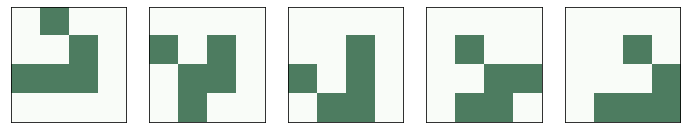

In [12]:
# glider
plt.figure(figsize=(12, 4))

glider = ['010', '001', '111']
life = make_life(4, 4, 0, 0, *glider)

for i in range(1, 6):
    plt.subplot(1, 5, i)
    life.draw()
    life.step()
    
savefig('figs/chap06-3')

Here's an animation showing glider movement.

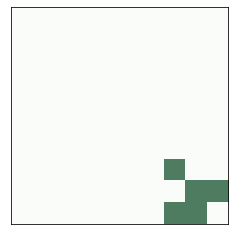

In [13]:
life = make_life(10, 10, 0, 0, '010', '001', '111')
life.animate(frames=28, interval=0.2)

**Exercise:** If you start GoL from a random configuration, it usually runs chaotically for a while and then settles into stable patterns that include blinkers, blocks, and beehives, ships, boats, and loaves.

For a list of common "natually" occurring patterns, see Achim Flammenkamp, "[Most seen natural occurring ash objects in Game of Life](http://wwwhomes.uni-bielefeld.de/achim/freq_top_life.html)",

Start GoL in a random state and run it until it stabilizes (try 1000 steps).
What stable patterns can you identify?

Hint: use `np.random.randint`.

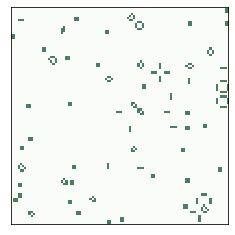

In [14]:
# Solution

n = 100
life = Life(n)
life.array = np.random.randint(2, size=(n, n), dtype=np.uint8)
life.animate(frames=1000)

## Methuselas

Most initial conditions run for a short time and reach a steady state.  But some initial conditional run for a surprisingly long time; they are called [Methuselahs](https://en.wikipedia.org/wiki/Methuselah_(cellular_automaton)).

The r-pentomino starts with only five live cells, but it runs for 1103 steps before stabilizing.

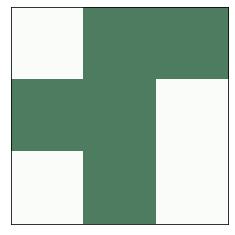

In [15]:
# r pentomino
rpent = ['011', '110', '010']
life = make_life(3, 3, 0, 0, *rpent)
life.draw()

Here are the start and finish configurations.

Saving figure to file figs/chap06-4


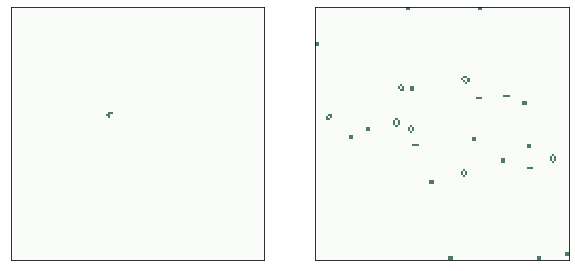

In [16]:
# r pentomino
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(120, 120, 50, 45, *rpent)
life.draw()

for i in range(1103):
    life.step()

plt.subplot(1, 2, 2)
life.draw()

savefig('figs/chap06-4')

And here's the animation that shows the steps.

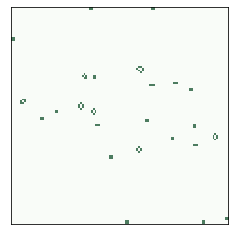

In [17]:
life = make_life(120, 120, 50, 45, *rpent)
life.animate(frames=1200)

## Conway's conjecture

Most initial conditions run for a short time and reach a steady state.  Some, like the r-pentomino, run for a long time before they reach steady state.  Another example is [rabbits](https://web.archive.org/web/20081221152607/http://www.argentum.freeserve.co.uk/lex_r.htm#rabbits), which starts with only nine cells and runs 17331 steps before reaching steady state.

Patterns that take a long time to reach steady state are called [Methuselahs](https://en.wikipedia.org/wiki/Methuselah_(cellular_automaton))

Patterns like these prompted Conway's conjecture, which asks whether there are any initial conditions where the number of live cells is unbounded.

Gosper's glider gun was the first entity to be discovered that produces an unbounded number of live cells, which refutes Conway's conjecture.

In [25]:
glider_gun = [
    '000000000000000000000000100000000000',
    '000000000000000000000010100000000000',
    '000000000000110000001100000000000011',
    '000000000001000100001100000000000011',
    '110000000010000010001100000000000000',
    '110000000010001011000010100000000000',
    '000000000010000010000000100000000000',
    '000000000001000100000000000000000000',
    '000000000000110000000000000000000000'
]

Here's the initial configuration:

Saving figure to file figs/chap06-5


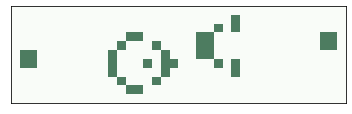

In [26]:
life = make_life(11, 38, 1, 1, *glider_gun)
life.draw()

savefig('figs/chap06-5')

And here's what it looks like running:

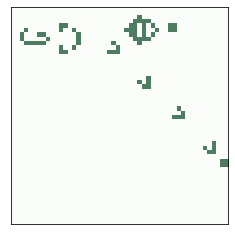

In [27]:
life = make_life(50, 50, 2, 2, *glider_gun)
life.animate(frames=200)

Another way to refute Conway's conjecture is a [puffer train](https://en.wikipedia.org/wiki/Puffer_train).

## Implementing Game of Life

As an example, I'll start with an array of random cells:

In [17]:
a = np.random.randint(2, size=(10, 10), dtype=np.uint8)
print(a)

[[0 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 1 1 0 1 1 0]
 [1 0 0 0 1 0 1 1 0 1]
 [1 0 1 0 1 0 1 0 0 1]
 [1 0 0 1 1 1 1 1 0 1]
 [0 0 0 0 1 1 0 1 0 0]
 [1 0 1 0 0 1 0 1 0 0]
 [0 0 1 1 1 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 1 0]
 [0 1 1 0 0 0 0 0 1 1]]


The following is a straightforward translation of the GoL rules using `for` loops and array slicing.

In [18]:
b = np.zeros_like(a)
rows, cols = a.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        state = a[i, j]
        neighbors = a[i-1:i+2, j-1:j+2]
        k = np.sum(neighbors) - state
        if state:
            if k==2 or k==3:
                b[i, j] = 1
        else:
            if k == 3:
                b[i, j] = 1

print(b)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 1 1 0 0]
 [0 0 0 0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]]


Here's a smaller, faster version using cross correlation.

In [19]:
from scipy.signal import correlate2d

kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==2) & a
b = b.astype(np.uint8)
print(b)

[[0 0 0 1 1 1 0 1 1 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 1 1 0 0]
 [0 0 0 0 1 1 0 1 1 1]
 [0 1 0 0 0 0 0 0 1 1]]


Using a kernel that gives a weight of 10 to the center cell, we can simplify the logic a little.

In [20]:
kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==12) | (c==13)
b = b.astype(np.uint8)
print(b)

[[0 0 0 1 1 1 0 1 1 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 1 1 0 0]
 [0 0 0 0 1 1 0 1 1 1]
 [0 1 0 0 0 0 0 0 1 1]]


More importantly, the second version of the kernel makes it possible to use a look up table to get the next state, which is faster and even more concise.

In [21]:
table = np.zeros(20, dtype=np.uint8)
table[[3, 12, 13]] = 1
c = correlate2d(a, kernel, mode='same')
b = table[c]
print(b)

[[0 0 0 1 1 1 0 1 1 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 1 1 0 0]
 [0 0 0 0 1 1 0 1 1 1]
 [0 1 0 0 0 0 0 0 1 1]]


**Exercise:** Many Game of Life patterns are available in portable file formats.  For one source, see http://www.conwaylife.com/wiki/Main_Page.

Write a function to parse one of these formats and initialize the array.

In [28]:
# Solution

# The easiest format to parse is plain text: 
        
def read_life_file(life, filename, row, col):
    i = row
    with open(filename) as f:
        for line in f:
            if line.startswith('!'):
                continue
            line = line.strip()
            line = line.replace('O', '1')
            line = line.replace('.', '0')
            life.add_cells(i, col, line)
            i += 1

In [29]:
# Solution

# Here's an example that loads a period 52 oscillator.

n = 19
m = 19
row = 1
col = 1

life = Life(n, m)
filename = '35p52.cells.txt'
read_life_file(life, filename, row, col)
life.draw()

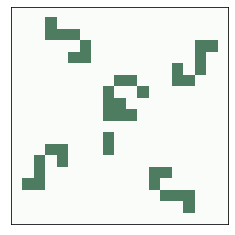

In [31]:
# Solution

# And here's the animation

life.animate(frames=52, interval=0.1)

## Highlife

One variation of GoL, called "Highlife", has the
same rules as GoL, plus one additional rule: a dead cell with 6
neighbors comes to life.

You can try out different rules by inheriting from `Life` and changing the lookup table.

**Exercise:** Modify the table below to add the new rule.

In [26]:
# Starter code

class MyLife(Life):
    """Implementation of Life."""

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

One of the more interesting patterns in Highlife is the replicator, which has the following initial configuration.


In [27]:
replicator = [
    '00111',
    '01001',
    '10001',
    '10010',
    '11100'
]

Make a `MyLife` object with `n=100` and use `add_cells` to put a replicator near the middle.

Make an animation with about 200 frames and see how it behaves.

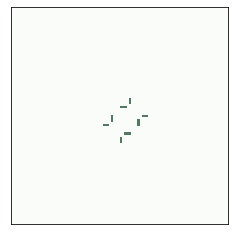

In [28]:
# Solution

n = 100
life = MyLife(n)
life.add_cells(n//2, n//2, *replicator)
life.animate(frames=200)

**Exercise:** 

If you generalize the Turing machine to two dimensions, or
add a read-write head to a 2-D CA, the result is a
cellular automaton called a Turmite.  It is named after a
termite because of the way the read-write head moves, but
spelled wrong as an homage to Alan Turing.

The most famous Turmite is Langton's Ant, discovered by Chris Langton
in 1986.  See http://en.wikipedia.org/wiki/Langton_ant.

The ant is a read-write head with
four states, which you can think of as facing north, south,
east or west.  The cells have two states, black and white.

The rules are simple.  During each time step, the ant checks the color
of the cell it is on.  If black, the ant turns to the right,
changes the cell to white, and moves forward one space.  If the cell
is white, the ant turns left, changes the cell to black, and moves
forward.

Given a simple world, a simple set of rules, and only one moving part,
you might expect to see simple behavior---but you should know
better by now.  Starting with all white cells, Langton's ant
moves in a seemingly random pattern for more than 10 000 steps
before it enters a cycle with a period of 104 steps.  After
each cycle, the ant is translated diagonally, so it leaves
a trail called the "highway".

Write an implementation of Langton's Ant.

In [32]:
# Solution

from matplotlib.patches import RegularPolygon

class Turmite(Cell2D):
    """Implements Langton's Ant"""

    # map from orientation to (di, dj)
    move = {0: (-1, 0),  # north
            1: (0, 1),   # east
            2: (1, 0),   # south
            3: (0, -1)}  # west

    def __init__(self, n, m=None):
        """Initializes the attributes.

        n: number of rows
        m: number of columns
        """
        m = n if m is None else m
        self.array = np.zeros((n, m), np.uint8)
        self.loc = np.array([n//2, m//2])
        self.state = 0

    def step(self):
        """Executes one time step."""
        # in order to use an array as an index, we have to make it a tuple
        # https://docs.scipy.org/doc/numpy/user/quickstart.html#indexing-with-arrays-of-indices
        loc = tuple(self.loc)

        # get the state of the current cell
        try:
            cell = self.array[loc]
        except IndexError:
            raise IndexError('The turmite has gone off the grid')

        # toggle the current cell
        self.array[loc] ^= 1

        if cell:
            # turn left
            self.state = (self.state + 3) % 4
        else:
            # turn right
            self.state = (self.state + 1) % 4

        move = self.move[self.state]
        self.loc += move

    def draw(self):
        """Updates the display with the state of the grid."""
        super().draw()
        
        # draw the arrow
        center, orientation = self.arrow_specs()
        self.arrow = RegularPolygon(center, 3, color='orange',
                                    radius=0.4, orientation=orientation)
        ax = plt.gca()
        ax.add_patch(self.arrow)

    def arrow_specs(self):
        """Computes the center and orientation of the arrow."""
        a = self.array
        n, m = a.shape
        i, j = self.loc
        center = j+0.5, n-i-0.5
        orientation = -np.pi / 2 * self.state
        return center, orientation

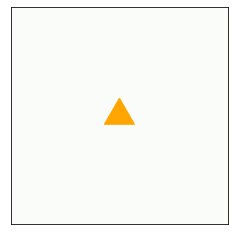

In [33]:
n = 5
turmite = Turmite(n)
turmite.draw()

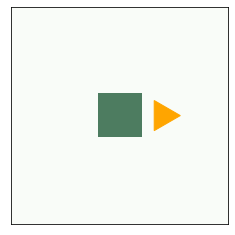

In [34]:
turmite.step()
turmite.draw()

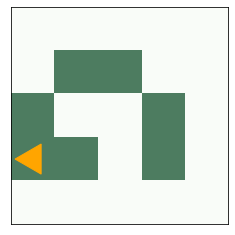

In [35]:
# Solution

# Here's a small version that shows the first 20 steps:

turmite = Turmite(n=5)
anim = turmite.animate(frames=20, interval=0.5)

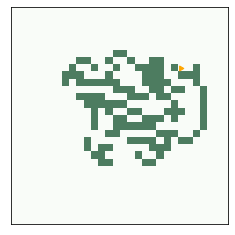

In [36]:
# And a larger version with 1000 steps

turmite = Turmite(n=30)
anim = turmite.animate(frames=1000)